In [8]:
import numpy as np
import matplotlib.pyplot as plt
from imp import reload
from skimage import img_as_float
from skimage import morphology
import sys
sys.path.insert(0, '..')
import utilities as ut

In [3]:
hst = img_as_float(ut.read_hyperstack('../data/wt_gbe_20180110.h5'))

In [4]:
img = hst[0]

In [9]:
from skimage import filters
#bw = threshold_adaptive(image, 95, offset=-15)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


TypeError: Image data cannot be converted to float

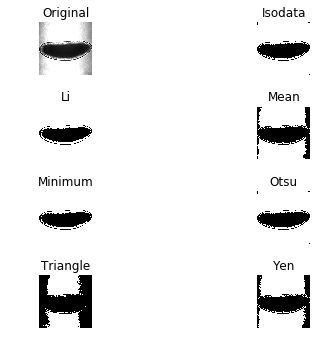

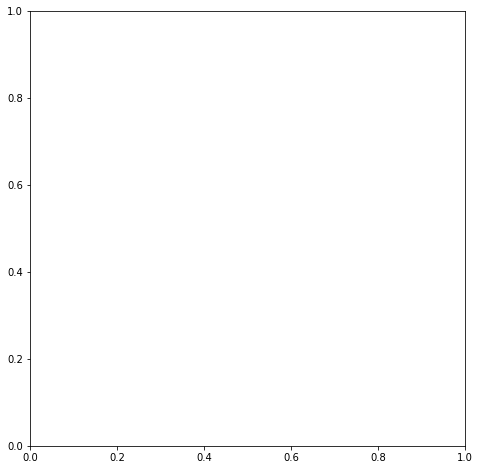

In [15]:
ut.imshow(filters.try_all_threshold(img))

isodata, minimum, li, yen

In [17]:
filters.threshold_isodata?

Signature: filters.threshold_isodata(image, nbins=256, return_all=False)
Docstring:
Return threshold value(s) based on ISODATA method.

Histogram-based threshold, known as Ridler-Calvard method or inter-means.
Threshold values returned satisfy the following equality::

    threshold = (image[image <= threshold].mean() +
                 image[image > threshold].mean()) / 2.0

That is, returned thresholds are intensities that separate the image into
two groups of pixels, where the threshold intensity is midway between the
mean intensities of these groups.

For integer images, the above equality holds to within one; for floating-
point images, the equality holds to within the histogram bin-width.

Parameters
----------
image : (N, M) ndarray
    Input image.
nbins : int, optional
    Number of bins used to calculate histogram. This value is ignored for
    integer arrays.
return_all: bool, optional
    If False (default), return only the lowest threshold that satisfies
    the above equa

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

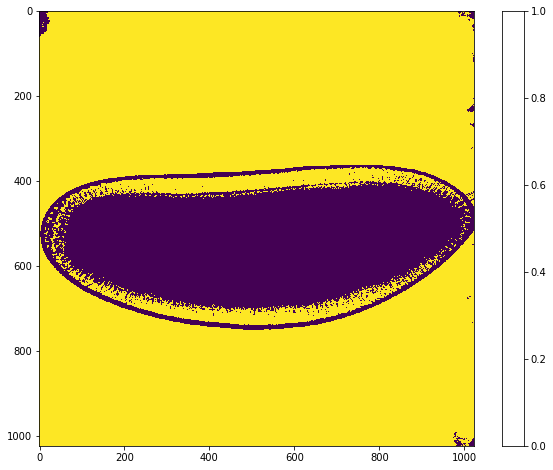

In [18]:
ut.imshow(img > filters.threshold_isodata(img))

In [19]:
from skimage.feature import blob_doh

In [20]:
from skimage.measure import label

In [38]:
im_thresh = img > filters.threshold_otsu(img)

In [41]:
labels = label(im_thresh)

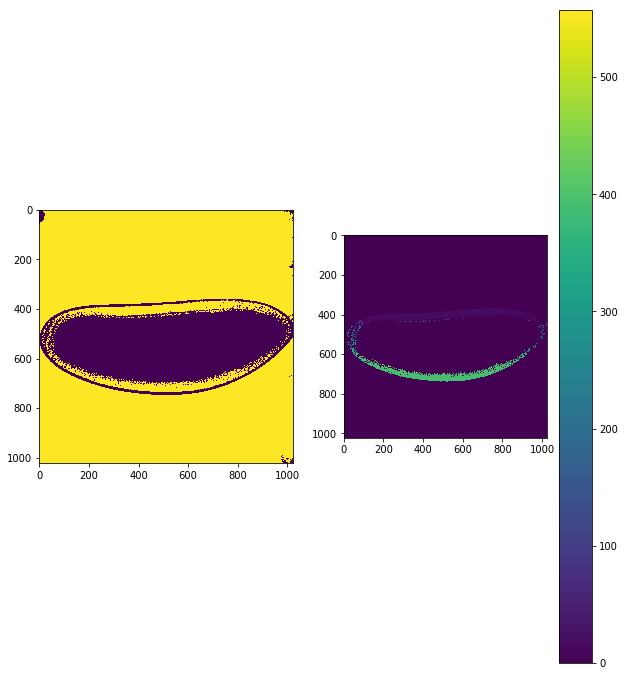

In [42]:
fig,ax = plt.subplots(1,2,figsize=(10,12))
ax[0].imshow(im_thresh)
cax = ax[1].imshow(labels)
plt.colorbar(cax,ax=ax[1])

# Try contour method

In [43]:
from skimage.filters import gaussian
from skimage.segmentation import active_contour

In [63]:
s = np.linspace(0, 2*np.pi, 400)
x = 500 + 550*np.cos(s)
y = 530 + 250*np.sin(s)
init = np.array([x, y]).T

In [86]:
snake = active_contour(gaussian(img, 3),
                       init, alpha=0.015, beta=10, gamma=0.001)

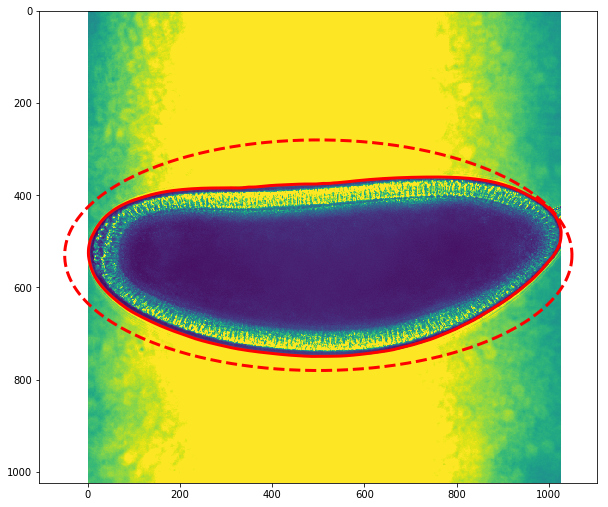

In [68]:
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-r', lw=3)

In [77]:
img.shape

(1024, 1024)

In [79]:
raster = np.round(snake).astype(int)
raster[raster>1024] = 1024

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

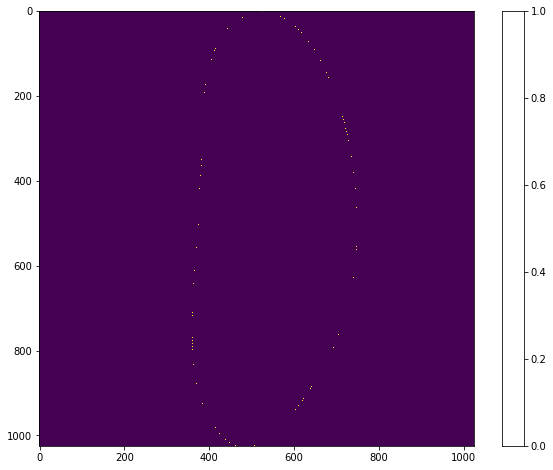

In [81]:
rmask = np.zeros_like(img)
r_mask[raster[:,0],raster[:,1]] = 1
r_mask = ndimage.binary_fill_holes(r_mask)
ut.imshow(r_mask)

In [84]:
from skimage import measure

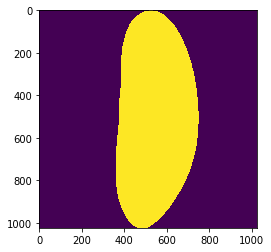

In [85]:
mask = measure.grid_points_in_poly(img.shape, snake)
plt.imshow(mask)

In [73]:
import scipy.ndimage as ndimage    

r = img
contour = snake

# Create an empty image to store the masked array
r_mask = np.zeros((1025,1025))

# Create a contour image by using the contour coordinates rounded to their nearest integer value
r_mask[np.round(contour[:, 0]).astype('int'), np.round(contour[:, 1]).astype('int')] = 1

# Fill in the hole created by the contour boundary
r_mask = ndimage.binary_fill_holes(r_mask)

IndexError: index 1025 is out of bounds for axis 0 with size 1025